In [134]:
import numpy as np

In [135]:
class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """

    def __init__(self, n_clusters=None, n_init=None, max_iter=None, tol=None, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def _init_mu_k(self, X):
        rows = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        return X[rows, :]

    def _compute_SSE(self, X, mu, r):
        '''
        Calculate SSE
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Features of training data
        r : shape (n_samples, self.n_clusters)
          cluster assignment
        mu : shape (self.n_clusters, n_features)
          center points
        Return
        ----------
        SSE: shape (n_features, )
          SSE
        '''
        SSE = 0.0
        for k in range(0, self.n_clusters):
            #SSE += r[:, k] @ (X - mu[k, :])**2
            SSE += r[:, k] @ np.linalg.norm(X - mu[k, :], axis=1)**2
        return SSE
    
    def _allocate_r(self, X, mu):
        """
        Allocate data points X to the nearest center point.
        """
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        for k in range(0, self.n_clusters):
            distance_matrix[:, k] = np.linalg.norm(X - mu[k, :], axis=1)
        r = np.zeros((X.shape[0], self.n_clusters))
        r[np.arange(len(r)), np.argmin(distance_matrix, axis=1)] = 1
        return r

    def _move_mu(self, X, r):
        """
        Moves mu to the mean (center of gravity)
        """
        mu = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(0, self.n_clusters):
            mu[k, :] = X[r[:, k] == 1].mean(axis=0)
        return mu

    def _learning(self, X, init_mu):
        mu = init_mu
        r = self._allocate_r(X, mu)
        prev_mu = mu
        i = 0
        while (i < self.max_iter):
            mu = self._move_mu(X, r)
            r = self._allocate_r(X, mu)
            if (self.tol != None):
                if (abs(np.sum(mu - prev_mu)) <= self.tol):
                    break
            prev_mu = mu
            i+=1
        return mu, r

    def _find_best_learnings(self, X):
        SSE_list = []
        mu_list = []
        r_list = []
        for i in range(0, self.n_init):
            mu, r = self._learning(X, self._init_mu_k(X))
            SSE_list.append(self._compute_SSE(X, mu, r))
            mu_list.append(mu)
            r_list.append(r)
            if self.verbose:
                print("iter: {}   SSE: {}".format(i, SSE_list[-1]))
        min_idx = np.argmin(np.array(SSE_list))
        return SSE_list[min_idx], mu_list[min_idx], r_list[min_idx]

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("learning...")
            self.SSE, self.mu, self.r = self._find_best_learnings(X)
        else:
            self.SSE, self.mu, self.r = self._find_best_learnings(X)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        return np.where(self._allocate_r(X, self.mu) == 1)[1]

<h3>Dataset</h3>

In [136]:
from sklearn.datasets import make_blobs
X, correct_labels = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

Text(0.5, 1.0, 'Blobs, centers = 4, features = 2, samples = 100')

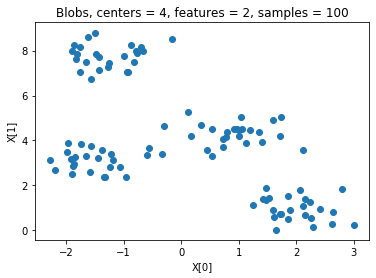

In [137]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.title("Blobs, centers = 4, features = 2, samples = 100")

<h3>[Problem 8] Implementation of elbow method</h3>

In [138]:
def elbow_method(X, head_k, tail_k):
    SSE_list = []
    k_list = []
    for k in range(head_k, tail_k + 1):
        model = ScratchKMeans(n_clusters=k, n_init=100, max_iter=100, tol=0.5, verbose=False)
        model.fit(X)
        SSE_list.append(model.SSE)
        k_list.append(k)
    return SSE_list, k_list

In [139]:
SSE_list, k_list = elbow_method(
            X=X,
            head_k=1,
            tail_k=20
            )
print("SSE_list: \n {}".format(SSE_list))
print("k_list: \n {}".format(k_list))

IndexError: index 44 is out of bounds for axis 1 with size 1

Text(0.5, 1.0, 'SSE graph')

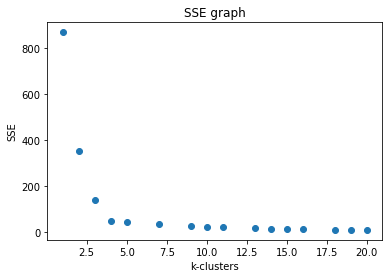

In [133]:
plt.scatter(k_list, SSE_list)
plt.xlabel("k-clusters")
plt.ylabel("SSE")
plt.title("SSE graph")

<h3>[Problem 9] (Advance assignment) Silhouette diagram</h3>